In [15]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [16]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [17]:
NUM_CLASSES = 5

# 学習データ読み込み

In [18]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [19]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [22]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_2 (Dropout)             │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │            55 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,125 (4.39 KB)

 Trainable params: 1,125 (4.39 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# モデルチェックポイントのコールバック (Model Checkpoint Callback)
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    "model/keypoint_classifier/keypoint_classifier.keras",  # Change extension to .keras
    verbose=1, 
    save_weights_only=False
)

# 早期打ち切り用コールバック (Early Stopping Callback)
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)


In [24]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [25]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
27/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1187 - loss: 1.8716   
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.1221 - loss: 1.8645 - val_accuracy: 0.2903 - val_loss: 1.6040
Epoch 2/1000
23/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2621 - loss: 1.6021 
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.2667 - loss: 1.5943 - val_accuracy: 0.4646 - val_loss: 1.4328
Epoch 3/1000
24/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3342 - loss: 1.4649 
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3378 - loss: 1.4607 - val_accuracy: 0.4786 - val_loss: 1.3359
Epoch 4/1000
25/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3699 - loss: 1.4001 
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.ke

In [26]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9233 - loss: 0.2568 


In [27]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [28]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
[0.00333847 0.9819949  0.01466659]
1


# 混同行列

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


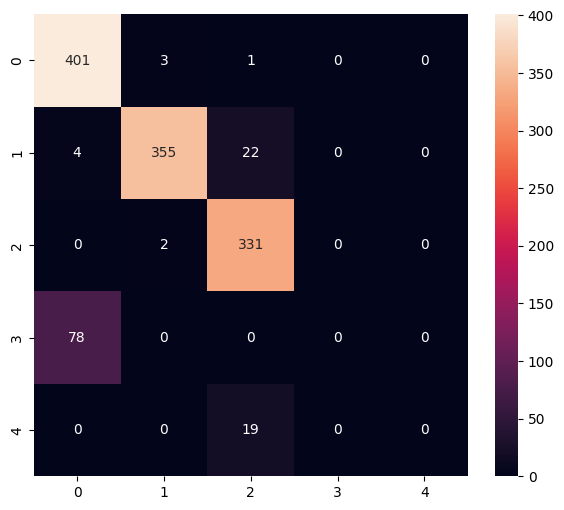

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.99      0.90       405
           1       0.99      0.93      0.96       381
           2       0.89      0.99      0.94       333
           3       0.00      0.00      0.00        78
           4       0.00      0.00      0.00        19

    accuracy                           0.89      1216
   macro avg       0.54      0.58      0.56      1216
weighted avg       0.83      0.89      0.86      1216



d:\krish\Documents\UBC_year_4\ELEC_391\computer_opencv_stuff\RealTimeObjectDetection\hand-gesture-recognition-mediapipe\.conda\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\krish\Documents\UBC_year_4\ELEC_391\computer_opencv_stuff\RealTimeObjectDetection\hand-gesture-recognition-mediapipe\.conda\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\krish\Documents\UBC_year_4\ELEC_391\computer_opencv_stuff\RealTimeObjectDetection\hand-gesture-recognition-mediapipe\.conda\lib\site-packages\sklearn\met

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [30]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [31]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\krish\AppData\Local\Temp\tmpk5okcxs9\assets


INFO:tensorflow:Assets written to: C:\Users\krish\AppData\Local\Temp\tmpk5okcxs9\assets


Saved artifact at 'C:\Users\krish\AppData\Local\Temp\tmpk5okcxs9'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_1')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  2014279327360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2014279387616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2014296935936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2014296932768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2014279388320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2014296941568: TensorSpec(shape=(), dtype=tf.resource, name=None)


6504

# 推論テスト

In [32]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

d:\krish\Documents\UBC_year_4\ELEC_391\computer_opencv_stuff\RealTimeObjectDetection\hand-gesture-recognition-mediapipe\.conda\lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [33]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [34]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [35]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [36]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.00333847 0.9819949  0.01466658]
1
